# Crash data 

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import date2num
import seaborn as sns
import chart_studio.plotly as py
import plotly.tools as tls
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fontSize = 14

# read data
df = pd.read_csv('Madison_crash_2009_2019.csv')

# Check if column in interest is actually in the dataframe
columns = list(df.columns)

/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
#Check null value
df.isna().sum()

DOCTNMBR              0
ACCDDATE              0
NTFYHOUR              0
REGION                0
COUNTY                0
                  ...  
DRVRPC2           45775
STNM21            16884
STNM22            18021
WISLR_LATDECDG     3550
WISLR_LONDECDG     3550
Length: 66, dtype: int64

### What kind of vihicle were hit?

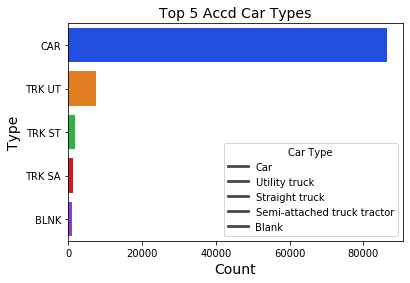

In [6]:
# get data in interest
fontSize = 14
v1 = df['VEHTYPE1'].value_counts().to_frame().reset_index()
v2 = df['VEHTYPE2'].value_counts().to_frame().reset_index()
v1.columns = ["type","count"]
v2.columns = ["type","count"]
v = v1
v["count"] = v1["count"] + v2["count"]
v = v.reset_index().sort_values(by = ['count'], ascending = False).head(5)

plot = sns.barplot(data = v, x = "count", y = "type", orient = "h", palette = 'bright')
plot.set_xlabel('Count', fontsize = fontSize)
plot.set_ylabel('Type', fontsize = fontSize)
plot.set_title('Top 5 Accd Car Types', fontsize = fontSize)
plot.legend(['Car', 'Utility truck', 'Straight truck', "Semi-attached truck tractor","Blank"], title='Car Type')

# Save plot
plot.figure.savefig('AccidCarType.png')

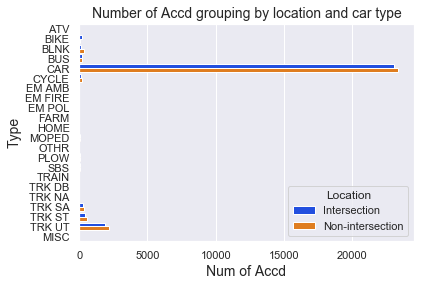

In [10]:
# Get plot: vehicle type 1 vs Location
fontSize = 14
VHTYPE_LOC = df.groupby(['ACCDLOC','VEHTYPE1']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
VHTYPE_LOC_plot = sns.barplot(x='DOCTNMBR', y='VEHTYPE1', hue='ACCDLOC', data=VHTYPE_LOC, palette = 'bright')
VHTYPE_LOC_LEG = VHTYPE_LOC_plot.get_legend_handles_labels()[0]
VHTYPE_LOC_plot.legend(VHTYPE_LOC_LEG, ['Intersection', 'Non-intersection'], title='Location')
VHTYPE_LOC_plot.set_title('Number of Accd grouping by location and car type', fontsize = 14)
VHTYPE_LOC_plot.set_xlabel('Num of Accd', fontsize = fontSize)
VHTYPE_LOC_plot.set_ylabel('Type', fontsize = fontSize)
VHTYPE_LOC_plot

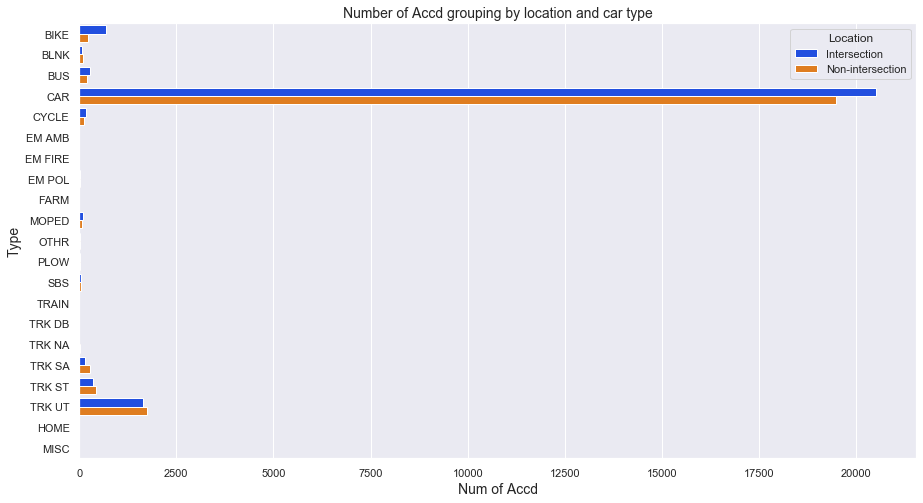

In [11]:
# Get plot: vehicle type 2 vs Location
fontSize = 14
VHTYPE_LOC = df.groupby(['ACCDLOC','VEHTYPE2']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
VHTYPE_LOC_plot = sns.barplot(x='DOCTNMBR', y='VEHTYPE2', hue='ACCDLOC', data=VHTYPE_LOC, palette = 'bright')
VHTYPE_LOC_LEG = VHTYPE_LOC_plot.get_legend_handles_labels()[0]
VHTYPE_LOC_plot.legend(VHTYPE_LOC_LEG, ['Intersection', 'Non-intersection'], title='Location')
VHTYPE_LOC_plot.set_title('Number of Accd grouping by location and car type', fontsize = fontSize)
VHTYPE_LOC_plot.set_xlabel('Num of Accd', fontsize = fontSize)
VHTYPE_LOC_plot.set_ylabel('Type', fontsize = fontSize)
VHTYPE_LOC_plot

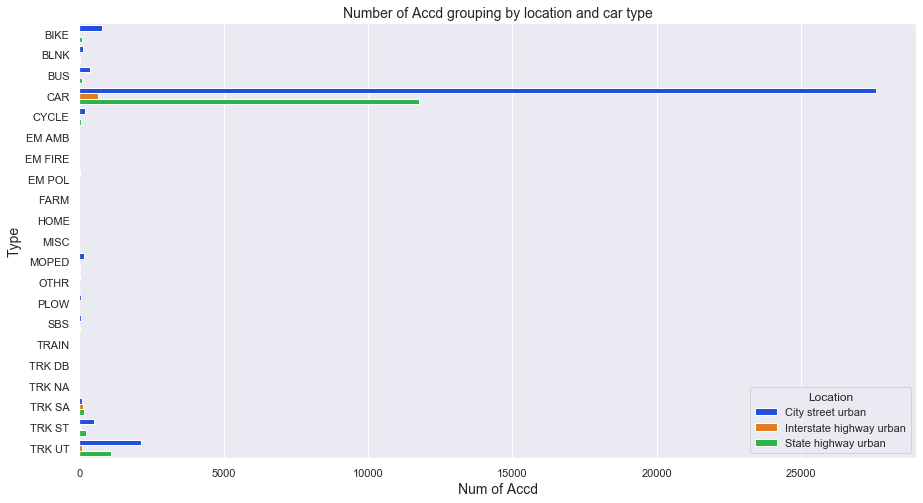

In [12]:
# Get plot: vehicle type 2 vs Road Type
fontSize = 14
VHTYPE_HWYCLASS = df.groupby(['HWYCLASS','VEHTYPE2']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
VHTYPE_HWYCLASS_PLOT = sns.barplot(x='DOCTNMBR', y='VEHTYPE2', hue='HWYCLASS', data=VHTYPE_HWYCLASS, palette = 'bright')
VHTYPE_HWYCLASS_LEG = VHTYPE_HWYCLASS_PLOT.get_legend_handles_labels()[0]
VHTYPE_HWYCLASS_PLOT.legend(VHTYPE_HWYCLASS_LEG, ['City street urban', 'Interstate highway urban', 'State highway urban'], title='Location')
VHTYPE_HWYCLASS_PLOT.set_title('Number of Accd grouping by location and car type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_xlabel('Num of Accd', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_ylabel('Type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT

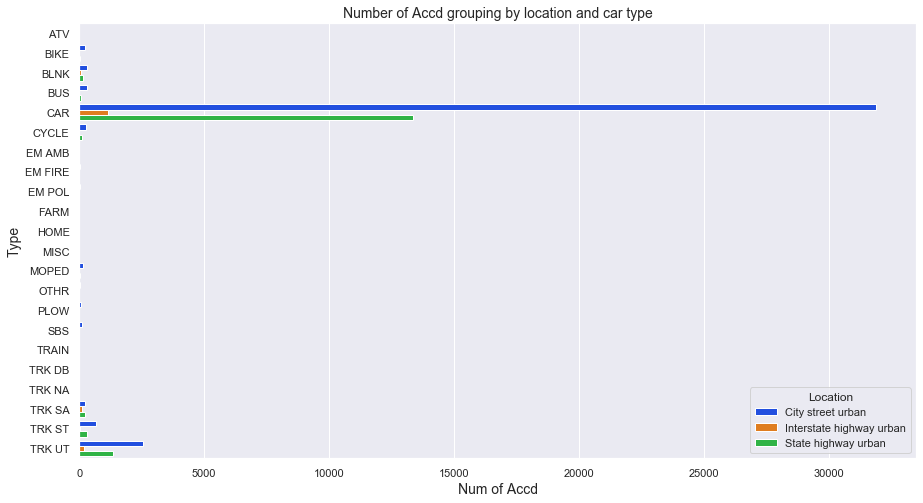

In [13]:
# Get plot: vehicle type 1 vs Road Type
fontSize = 14
VHTYPE_HWYCLASS = df.groupby(['HWYCLASS','VEHTYPE1']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
VHTYPE_HWYCLASS_PLOT = sns.barplot(x='DOCTNMBR', y='VEHTYPE1', hue='HWYCLASS', data=VHTYPE_HWYCLASS, palette = 'bright')
VHTYPE_HWYCLASS_LEG = VHTYPE_HWYCLASS_PLOT.get_legend_handles_labels()[0]
VHTYPE_HWYCLASS_PLOT.legend(VHTYPE_HWYCLASS_LEG, ['City street urban', 'Interstate highway urban', 'State highway urban'], title='Location')
VHTYPE_HWYCLASS_PLOT.set_title('Number of Accd grouping by location and car type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_xlabel('Num of Accd', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_ylabel('Type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT

Text(0, 0.5, 'Count')

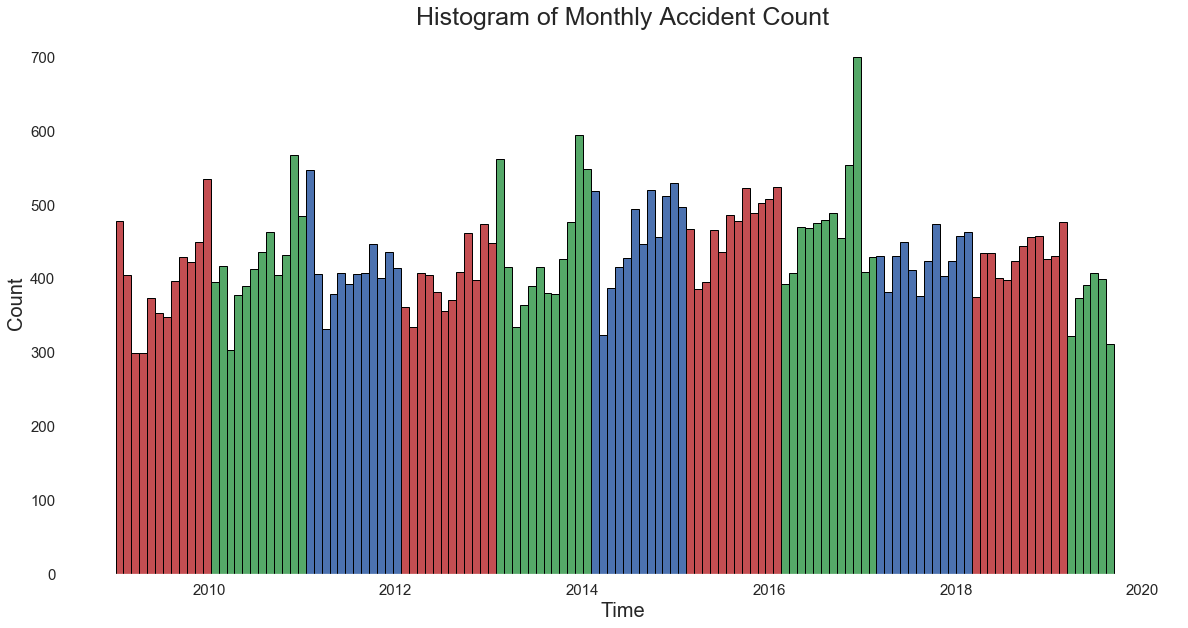

In [14]:
# date formatting

start = datetime.date(2009,1,1) 
end = datetime.date(2019,8,1)
monthBin = datetime.timedelta(days = 31)  
seasonBin = datetime.timedelta(days = 122) 
yearBin = datetime.timedelta(days = 365)  
months = []
seasons = []
years = []
for i in range(((end-start).days)//30 + 1):  
    months.append(start + (i)*monthBin)

for i in range(((end-start).days)//121 + 1):  
    seasons.append(start + (i)*seasonBin)

for i in range(((end-start).days)//365 + 1):  
    years.append(start + (i)*yearBin)

numMonth= date2num(months)
numSeason= date2num(seasons)
numYear = date2num(years)

"""# seasonly plot
# prepare data
s = plt
plt.figure(figsize=(20,10))
s.hist(x = sort_date, color = 'black', edgecolor = 'white', bins = numSeason)
# Add labels
plt.title('Histogram of Seasonly Accident Count')
plt.xlabel('Time')
plt.ylabel('Count') 
s.show()"""

"""# yearly plot
# prepare data
y = plt
plt.figure(figsize=(20,10))
y.hist(x = sort_date, color = 'gold', edgecolor = 'black', bins = numYear)
# Add labels
plt.title('Histogram of Yearly Accident Count')
plt.xlabel('Time')
plt.ylabel('Count') 
y.show()"""

# monthly plot
# prepare data

fig, ax = plt.subplots(figsize=(20,10))
sort_date = sorted(pd.to_datetime(df["ACCDDATE"]))
N, bins, patches = ax.hist(x = sort_date, edgecolor = 'black', bins = numMonth)
ax.patch.set_facecolor('white')

colors = ["r","g","b"]
for i in range(11):
    color = i % len(colors)
    for j in range(12):
        if i*12 + j < len(numMonth) - 1:
            patches[i*12 + j].set_facecolor(colors[color])

# Add labels
plt.title('Histogram of Monthly Accident Count',fontsize = 25)
ax.tick_params(axis = "both", which="major", labelsize = 15 )
plt.xlabel('Time',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
#Save fig
#plt.savefig("HistAccdCount.png")

In [3]:
# Get Month Bin
dftime= pd.to_datetime(df["ACCDDATE"])
df["ACCDMONTH"] = ""
for i in range(len(dftime)):
    df["ACCDMONTH"][i] = int(dftime[i].month)
dfMonth = df["ACCDMONTH"].to_frame()

/Library/Python/3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
#get year bin
df["ACCDYEAR"] = ""

for i in range(len(dftime)):
    if dftime[i].year != 2019:
        df["ACCDYEAR"][i] = dftime[i].year
    else:
        df["ACCDYEAR"][i] = None

dfYear = df["ACCDYEAR"].to_frame().dropna()
dfYear.shape

/Library/Python/3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Python/3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(51124, 1)

In [10]:
# drop 2019 data
dfYear

,ACCDYEAR
0,2009
1,2012
2,2012
3,2011
4,2010
...,...
54324,2010
54325,2015
54326,2017
54327,2016


In [11]:
# Check dfMonth and dfYear
dfMonth
df["ACCDYEAR"]

0        2009
1        2012
2        2012
3        2011
4        2010
         ... 
54324    2010
54325    2015
54326    2017
54327    2016
54328    2016
Name: ACCDYEAR, Length: 54329, dtype: object

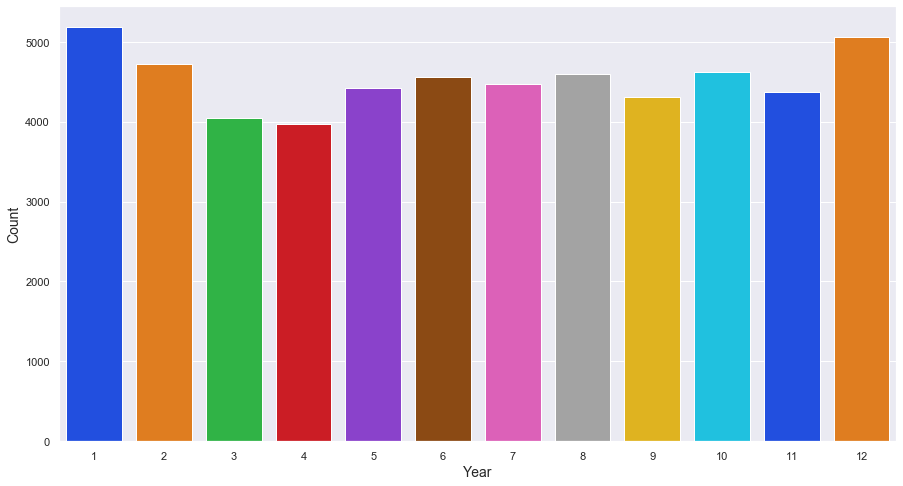

In [10]:
# plot: count vs month
fontSize = 14
ACCDMONTH_COUNT = df.groupby(['ACCDMONTH']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
ACCDMONTH_COUNT_PLOT = sns.barplot(x='ACCDMONTH', y='DOCTNMBR', data=ACCDMONTH_COUNT, palette = 'bright')
ACCDMONTH_COUNT_LEG = ACCDMONTH_COUNT_PLOT.get_legend_handles_labels()[0]
#VHTYPE_HWYCLASS_PLOT.legend(VHTYPE_HWYCLASS_LEG, ['City street urban', 'Interstate highway urban', 'State highway urban'], title='Location')
#VHTYPE_HWYCLASS_PLOT.set_title('Number of Accd grouping by location and car type', fontsize = fontSize)
ACCDMONTH_COUNT_PLOT.set_xlabel('Year', fontsize = fontSize)
ACCDMONTH_COUNT_PLOT.set_ylabel('Count', fontsize = fontSize)
ACCDMONTH_COUNT_PLOT

Text(0, 0.5, 'Count')

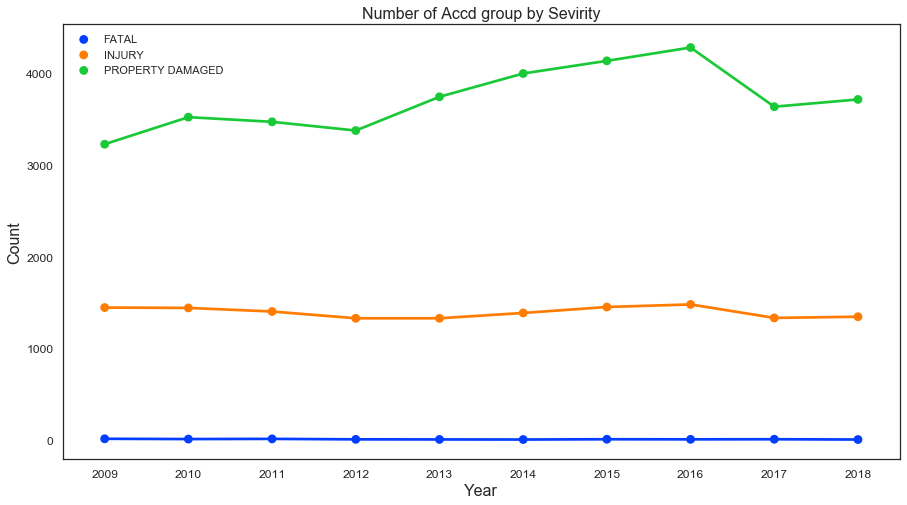

In [11]:
ACCDYEAR_ACCDSVR = df.groupby(['ACCDYEAR',"ACCDSVR"]).count()['DOCTNMBR'].to_frame().reset_index()
fontSize = 16
sns.set(font_scale=1.1,style="white")
plt.figure(figsize=(15,8))
ACCDYEAR_ACCDSVR_POINTPLOT = sns.pointplot(x='ACCDYEAR', y='DOCTNMBR', hue='ACCDSVR', data=ACCDYEAR_ACCDSVR, palette = 'bright',capsize=0.1)
ACCDYEAR_ACCDSVR_LEG = ACCDYEAR_ACCDSVR_POINTPLOT.get_legend_handles_labels()[0]
sns.set(style="whitegrid")
ACCDYEAR_ACCDSVR_POINTPLOT.legend(ACCDYEAR_ACCDSVR_LEG, ['FATAL', 'INJURY', 'PROPERTY DAMAGED'],frameon = False, title='')
ACCDYEAR_ACCDSVR_POINTPLOT.set_title('Number of Accd group by Severity', fontsize = fontSize)
ACCDYEAR_ACCDSVR_POINTPLOT.set_xlabel('Year', fontsize = fontSize)
ACCDYEAR_ACCDSVR_POINTPLOT.set_ylabel('Count', fontsize = fontSize)

#plt.savefig("PointPlot_Month.png")

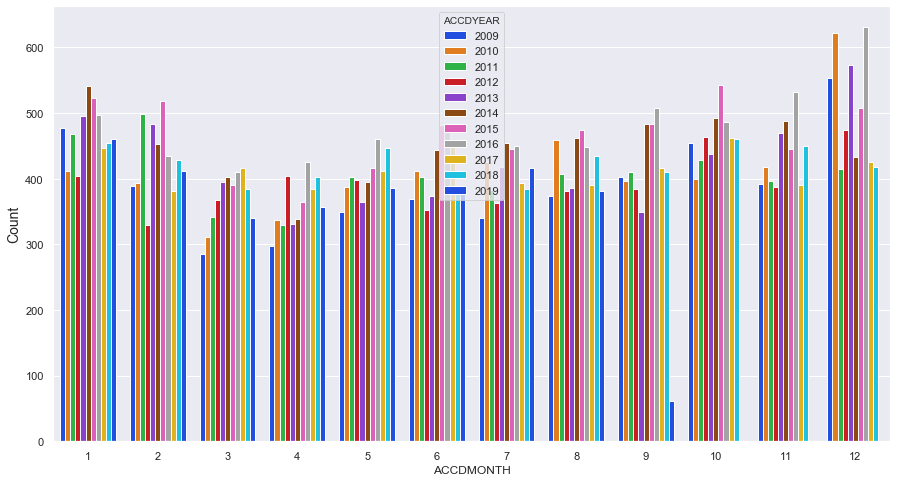

In [24]:
# plot: vehicle type 1 vs Road Type
fontSize = 14
VHTYPE_HWYCLASS = df.groupby(['ACCDMONTH','ACCDYEAR']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
VHTYPE_HWYCLASS_PLOT = sns.barplot(x='ACCDMONTH', y='DOCTNMBR', hue='ACCDYEAR', data=VHTYPE_HWYCLASS, palette = 'bright')
VHTYPE_HWYCLASS_LEG = VHTYPE_HWYCLASS_PLOT.get_legend_handles_labels()[0]
#VHTYPE_HWYCLASS_PLOT.legend(VHTYPE_HWYCLASS_LEG, ['City street urban', 'Interstate highway urban', 'State highway urban'], title='Location')
#VHTYPE_HWYCLASS_PLOT.set_title('Number of Accd grouping by location and car type', fontsize = fontSize)
#VHTYPE_HWYCLASS_PLOT.set_xlabel('Num of Accd', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_ylabel('Count', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT

Text(0, 0.5, 'Count')

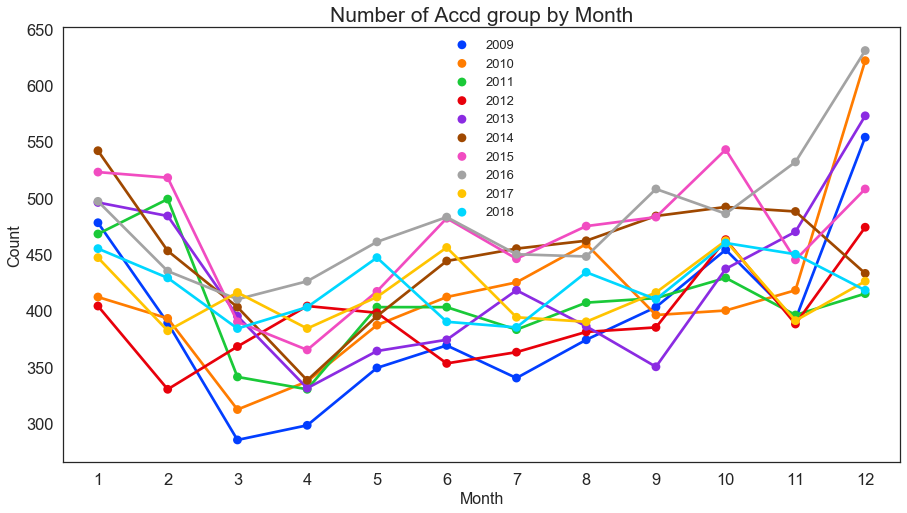

In [19]:
ACCDMONTH_ACCDYEAR = df.groupby(['ACCDMONTH','ACCDYEAR']).count()['DOCTNMBR'].to_frame().reset_index()
fontSize = 16
sns.set(font_scale=1.5,style="white")
plt.figure(figsize=(15,8))
ACCDMONTH_ACCDYEAR_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='ACCDYEAR', data=ACCDMONTH_ACCDYEAR, palette = 'bright',capsize=0.1)
ACCDMONTH_ACCDYEAR_LEG = ACCDMONTH_ACCDYEAR_POINTPLOT.get_legend_handles_labels()[0]
year_list = [i for i in range(2009,2019)]
ACCDMONTH_ACCDYEAR_POINTPLOT.legend(ACCDMONTH_ACCDYEAR_LEG, year_list, frameon = False, title='',fontsize = 13)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_title('Number of Accd group by Month', fontsize = fontSize + 5)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_xlabel('Month', fontsize = fontSize)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_ylabel('Count', fontsize = fontSize)
plt.savefig("PointPlot_Month.png")

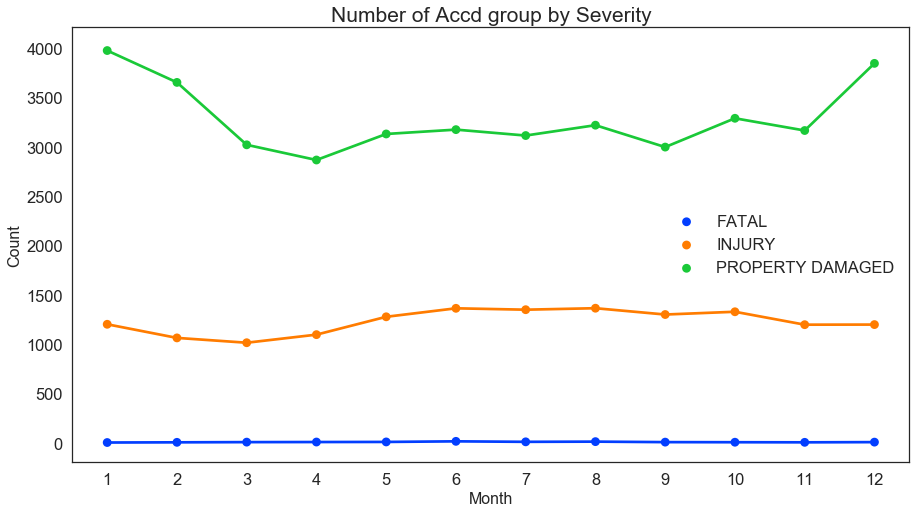

In [20]:
ACCDMONTH_ACCDSVR = df.groupby(['ACCDMONTH',"ACCDSVR"]).count()['DOCTNMBR'].to_frame().reset_index()
fontSize = 16
sns.set(font_scale=1.5,style="white")
plt.figure(figsize=(15,8))
ACCDMONTH_ACCDSVR_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='ACCDSVR', data=ACCDMONTH_ACCDSVR, palette = 'bright',capsize=0.1)
ACCDMONTH_ACCDSVR_LEG = ACCDMONTH_ACCDSVR_POINTPLOT.get_legend_handles_labels()[0]
ACCDMONTH_ACCDSVR_POINTPLOT.legend(ACCDMONTH_ACCDSVR_LEG, ['FATAL', 'INJURY', 'PROPERTY DAMAGED'],frameon = False, title='')
ACCDMONTH_ACCDSVR_POINTPLOT.set_title('Number of Accd group by Severity', fontsize = fontSize + 5)
ACCDMONTH_ACCDSVR_POINTPLOT.set_xlabel('Month', fontsize = fontSize)
ACCDMONTH_ACCDSVR_POINTPLOT.set_ylabel('Count', fontsize = fontSize)

plt.savefig("PointPlot_Month_SVR.png")

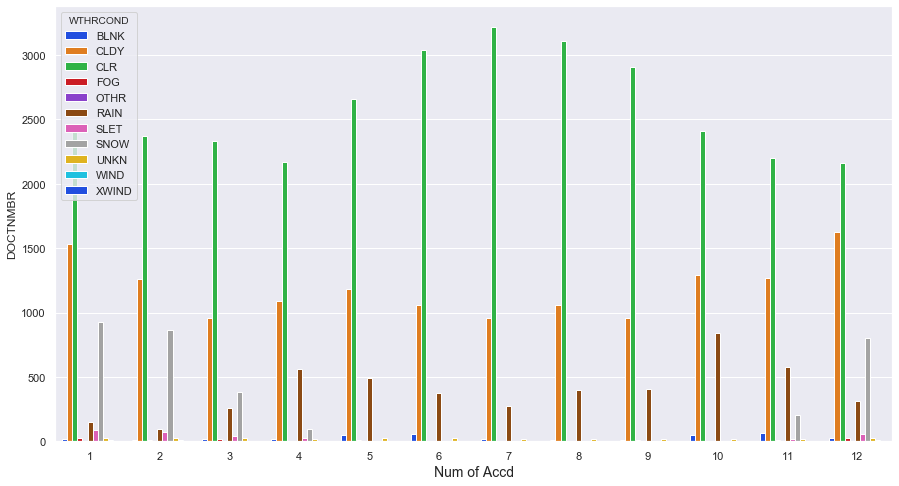

In [14]:
# plot: vehicle type 1 vs Road Type
fontSize = 14
VHTYPE_HWYCLASS = df.groupby(['ACCDMONTH','WTHRCOND']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
VHTYPE_HWYCLASS_PLOT = sns.barplot(x='ACCDMONTH', y='DOCTNMBR', hue='WTHRCOND', data=VHTYPE_HWYCLASS, palette = 'bright')
VHTYPE_HWYCLASS_LEG = VHTYPE_HWYCLASS_PLOT.get_legend_handles_labels()[0]
#VHTYPE_HWYCLASS_PLOT.legend(VHTYPE_HWYCLASS_LEG, ['City street urban', 'Interstate highway urban', 'State highway urban'], title='Location')
#VHTYPE_HWYCLASS_PLOT.set_title('Number of Accd grouping by location and car type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT.set_xlabel('Num of Accd', fontsize = fontSize)
#VHTYPE_HWYCLASS_PLOT.set_ylabel('Type', fontsize = fontSize)
VHTYPE_HWYCLASS_PLOT